<a href="https://colab.research.google.com/github/kilkenny1/StockWiz/blob/master/SMA_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas_datareader as web
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [35]:
df=web.DataReader('SPY', data_source='yahoo', start='2020-01-01', end='2020-11-30')

df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,324.890015,322.529999,323.540009,324.869995,59151200.0,320.273743
2020-01-03,323.640015,321.100006,321.160004,322.410004,77709700.0,317.848572
2020-01-06,323.730011,320.359985,320.489990,323.640015,55653900.0,319.061188
2020-01-07,323.540009,322.239990,323.019989,322.730011,40496400.0,318.164032
2020-01-08,325.779999,322.670013,322.940002,324.450012,68296000.0,319.859741
...,...,...,...,...,...,...
2020-11-23,358.820007,354.869995,357.279999,357.459991,63230600.0,357.459991
2020-11-24,363.809998,359.290009,360.209991,363.220001,62415900.0,363.220001
2020-11-25,363.160004,361.480011,363.130005,362.660004,45330900.0,362.660004


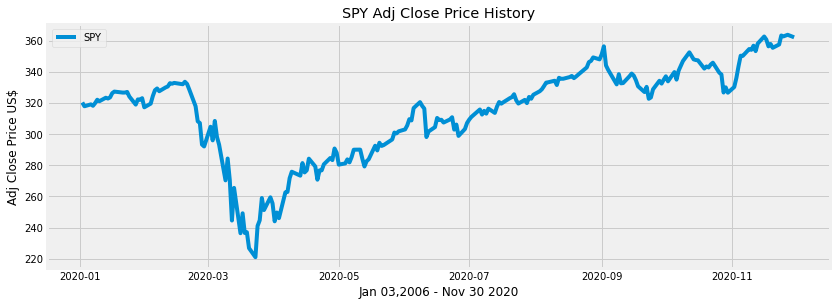

In [36]:
plt.figure(figsize=(12.5,4.5))
plt.plot(df['Adj Close'], label='SPY')
plt.title('SPY Adj Close Price History')
plt.xlabel('Jan 03,2006 - Nov 30 2020')
plt.ylabel('Adj Close Price US$')
plt.legend(loc='upper left')
plt.show()

In [37]:
#Create the simple moving average with a 30 day window

SMA30 = pd.DataFrame()
SMA30['Adj Close Price']=df['Adj Close'].rolling(window=30).mean()


In [38]:

SMA100 = pd.DataFrame()
SMA100['Adj Close Price']= df['Adj Close'].rolling(window=100).mean()

SMA100


,Adj Close Price
Date,
2020-01-02,NaN
2020-01-03,NaN
2020-01-06,NaN
2020-01-07,NaN
2020-01-08,NaN
...,...
2020-11-23,336.556356
2020-11-24,337.030697
2020-11-25,337.532007


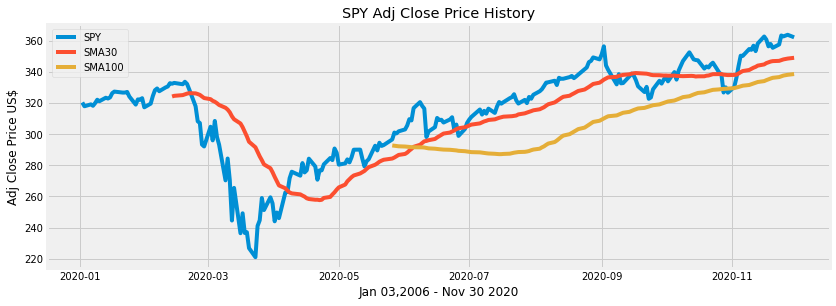

In [39]:
plt.figure(figsize=(12.5,4.5))
plt.plot(df['Adj Close'], label='SPY')
plt.plot(SMA30['Adj Close Price'], label='SMA30')
plt.plot(SMA100['Adj Close Price'], label='SMA100')
plt.title('SPY Adj Close Price History')
plt.xlabel('Jan 03,2006 - Nov 30 2020')
plt.ylabel('Adj Close Price US$')
plt.legend(loc='upper left')
plt.show()

In [47]:
data=pd.DataFrame()
data['SPY']=df['Adj Close']
data['SMA30']=SMA30['Adj Close Price']
data['SMA100']=SMA100['Adj Close Price']
data

,SPY,SMA30,SMA100
Date,,,
2020-01-02,320.273743,NaN,NaN
2020-01-03,317.848572,NaN,NaN
2020-01-06,319.061188,NaN,NaN
2020-01-07,318.164032,NaN,NaN
2020-01-08,319.859741,NaN,NaN
...,...,...,...
2020-11-23,357.459991,346.964669,336.556356
2020-11-24,363.220001,347.401002,337.030697
2020-11-25,362.660004,347.892002,337.532007


In [49]:
#Buy /sell Signal Function
def buy_sell(data):
  sigPriceBuy=[]
  sigPriceSell= []
  flag = -1

  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['SPY'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag !=0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['SPY'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  return (sigPriceBuy,sigPriceSell)


In [50]:
buy_sell= buy_sell(data)
data['Buy_signal_Price']=buy_sell[0]
data['Sell_signal_Price']=buy_sell[1]

In [51]:
data

,SPY,SMA30,SMA100,Buy_signal_Price,Sell_signal_Price
Date,,,,,
2020-01-02,320.273743,NaN,NaN,NaN,NaN
2020-01-03,317.848572,NaN,NaN,NaN,NaN
2020-01-06,319.061188,NaN,NaN,NaN,NaN
2020-01-07,318.164032,NaN,NaN,NaN,NaN
2020-01-08,319.859741,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-11-23,357.459991,346.964669,336.556356,NaN,NaN
2020-11-24,363.220001,347.401002,337.030697,NaN,NaN
2020-11-25,362.660004,347.892002,337.532007,NaN,NaN


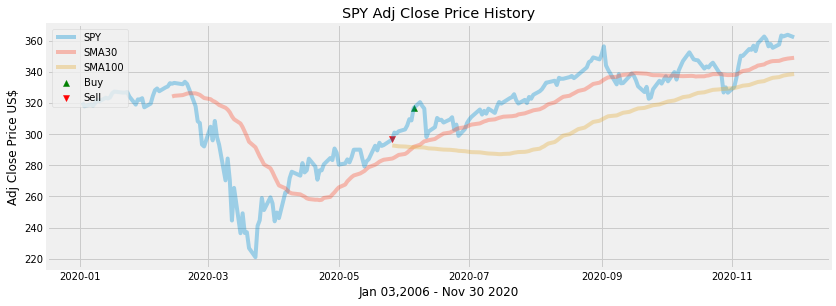

In [52]:
plt.figure(figsize=(12.5,4.5))
plt.plot(df['Adj Close'], label='SPY', alpha=0.35)
plt.plot(SMA30['Adj Close Price'], label='SMA30', alpha=0.35)
plt.plot(SMA100['Adj Close Price'], label='SMA100', alpha=0.35)
plt.scatter(data.index, data['Buy_signal_Price'],label='Buy', marker='^', color='green')
plt.scatter(data.index, data['Sell_signal_Price'],label='Sell', marker='v', color='red')
plt.title('SPY Adj Close Price History')
plt.xlabel('Jan 03,2006 - Nov 30 2020')
plt.ylabel('Adj Close Price US$')
plt.legend(loc='upper left')
plt.show()